# Evaluating the Heart Disease for a better understanding of it using ML and a basic DL model

### [Click here for the dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)

### Importing necessary libraries

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras import Sequential
from keras.layers import Dense
import keras

In [57]:
#implementing the dataset
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [58]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Preprocessing

In [60]:
encoder = LabelEncoder()
data['Sex'] = encoder.fit_transform(data['Sex'])
data['ChestPainType'] = encoder.fit_transform(data['ChestPainType'])
data['RestingECG'] = encoder.fit_transform(data['RestingECG'])
data['ExerciseAngina'] = encoder.fit_transform(data['ExerciseAngina'])
data['ST_Slope'] = encoder.fit_transform(data['ST_Slope'])
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int32(5), int64(6)
memory usage: 68.3 KB


### Ploting the features for a better understanding and observing the correlations

c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\RaDmAn2222\AppData\Local\Programs\Python\

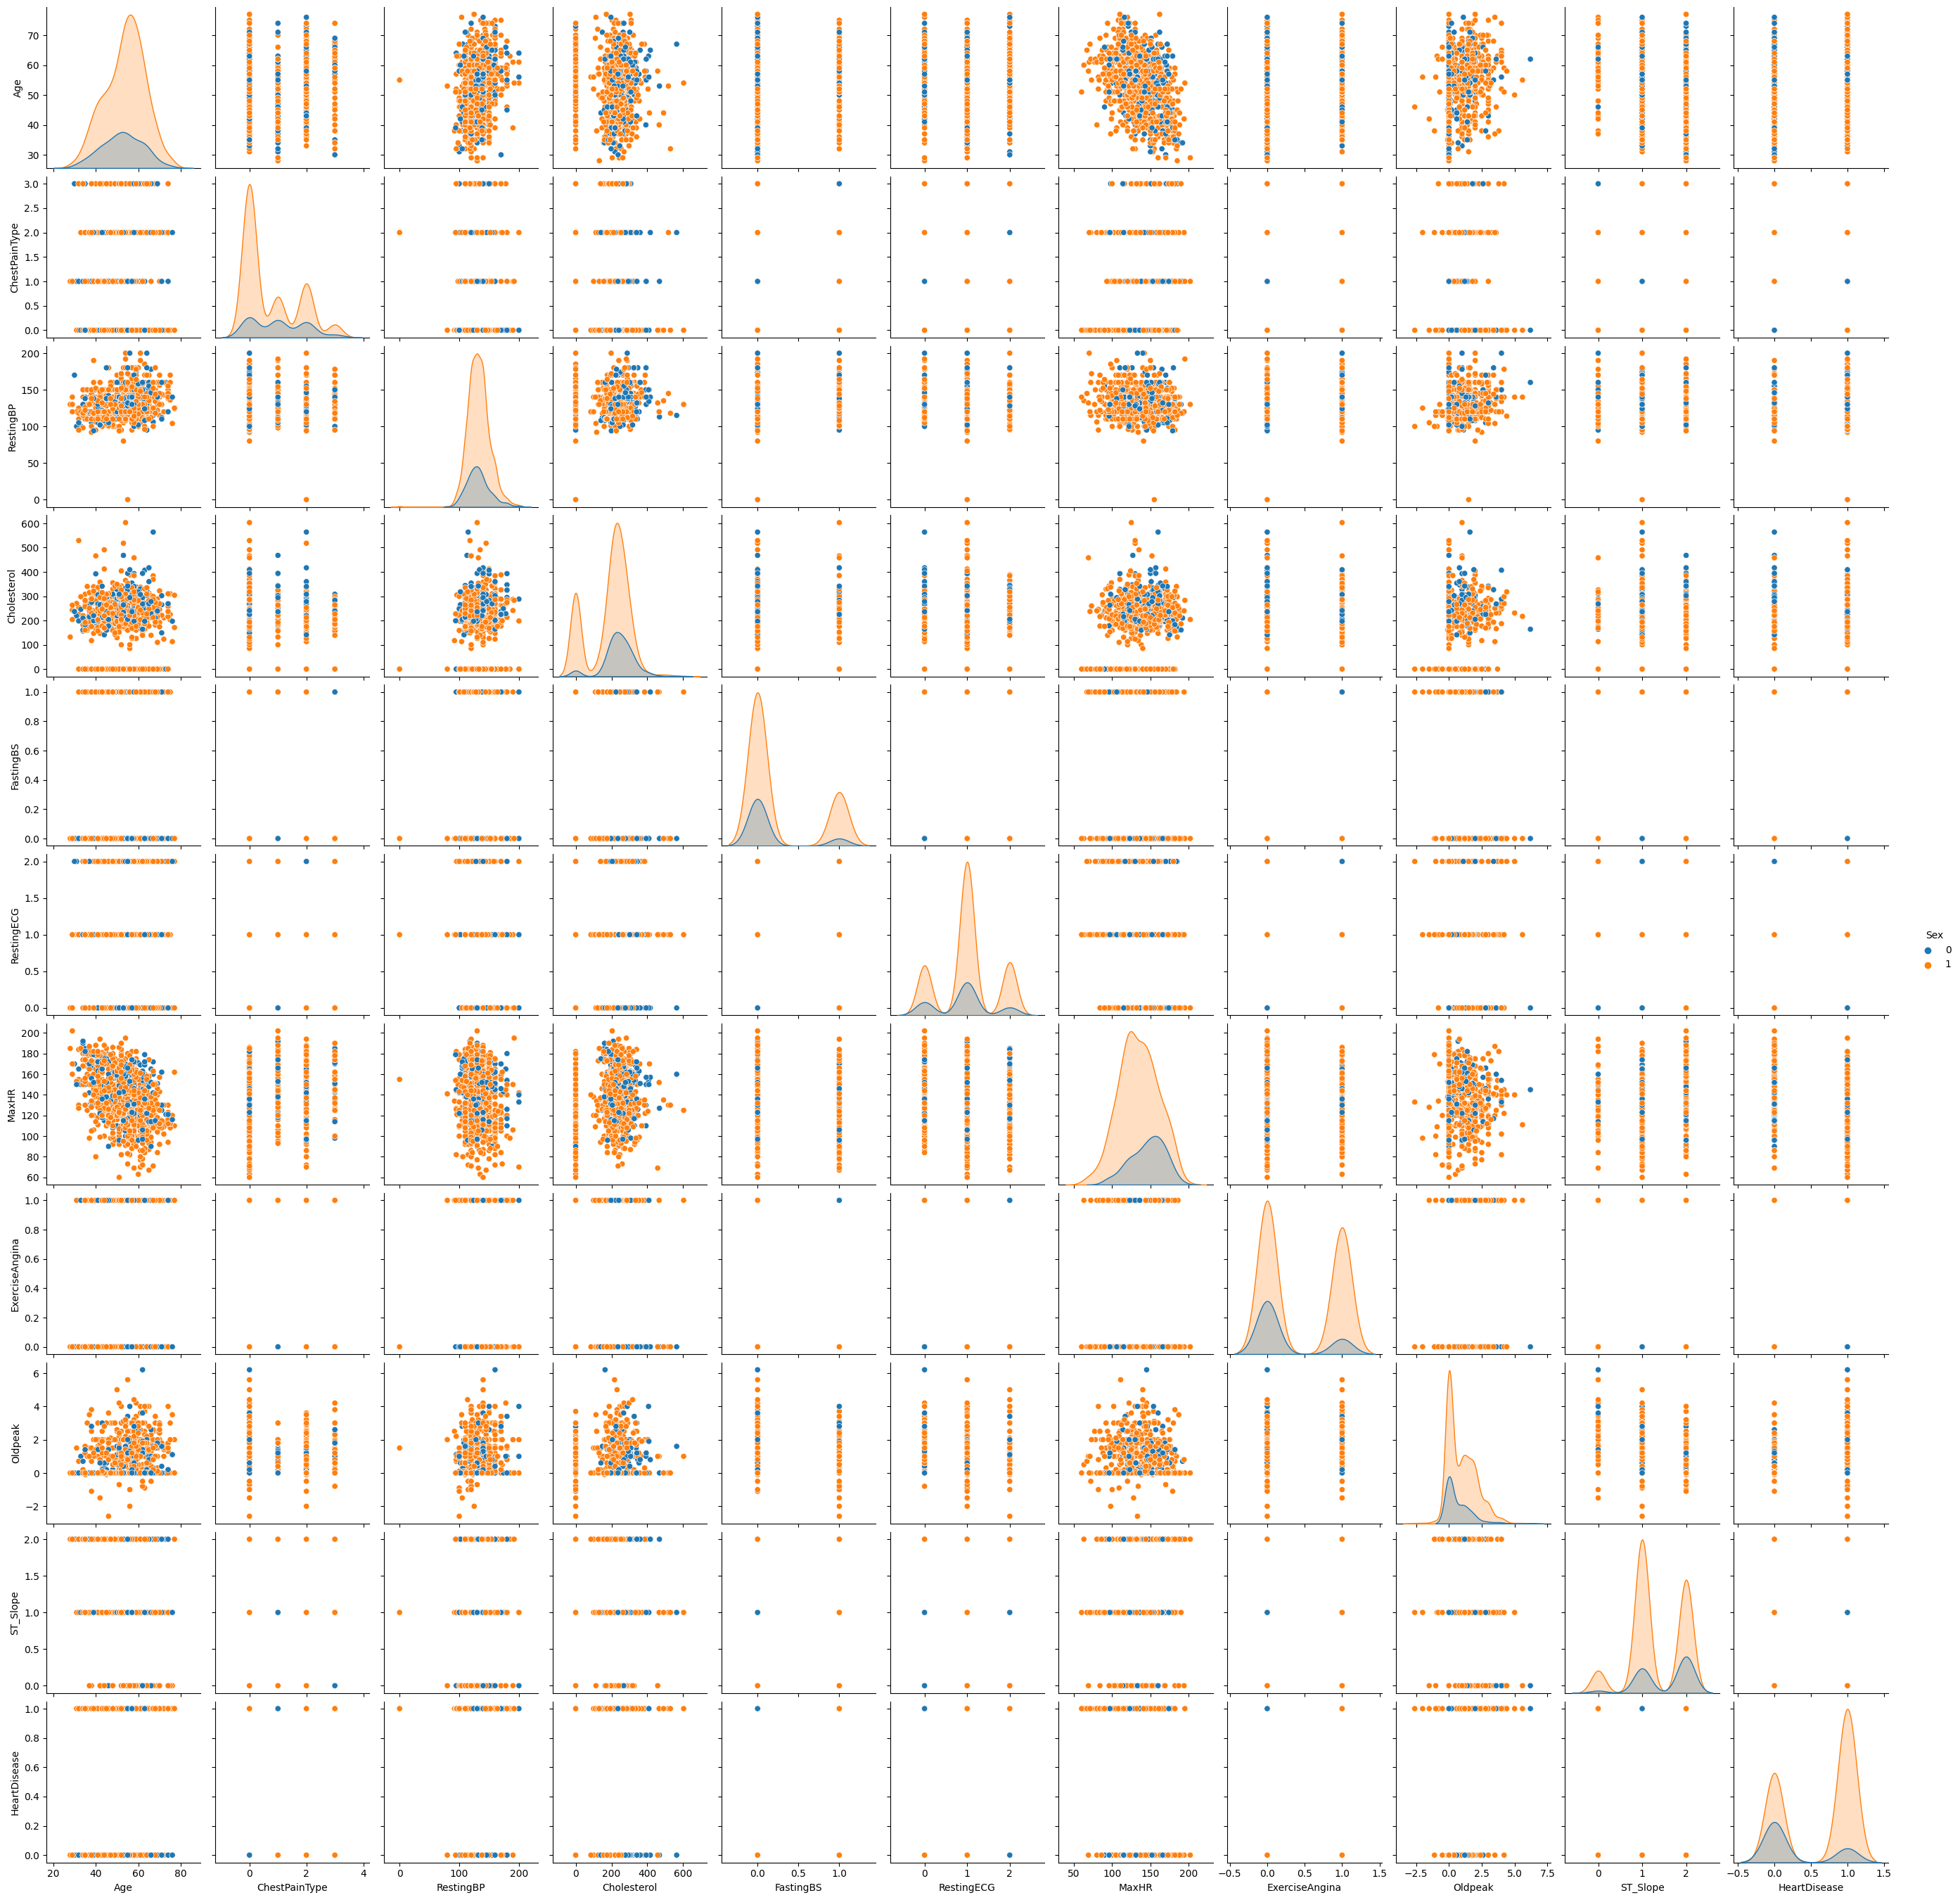

In [62]:
sns.pairplot(data, hue='Sex')
plt.show()

In [63]:
#scaling the datas
scaler = StandardScaler()

X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

X = scaler.fit_transform(X)
X

array([[-1.43,  0.52,  0.23, ..., -0.82, -0.83,  1.05],
       [-0.48, -1.94,  1.28, ..., -0.82,  0.11, -0.6 ],
       [-1.75,  0.52,  0.23, ..., -0.82, -0.83,  1.05],
       ...,
       [ 0.37,  0.52, -0.82, ...,  1.21,  0.29, -0.6 ],
       [ 0.37, -1.94,  0.23, ..., -0.82, -0.83, -0.6 ],
       [-1.65,  0.52,  1.28, ..., -0.82, -0.83,  1.05]])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

### Trying different classification algorithms for a higher accuracy

In [65]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', svm.SVC()))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
    Results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring= 'accuracy')
    results.append(Results)
    names.append(name)

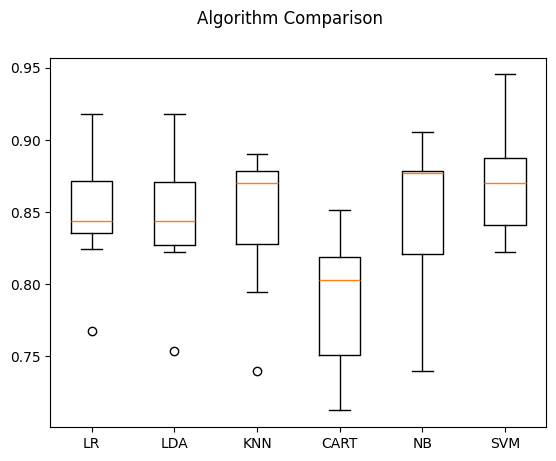

In [66]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [67]:
# using Logistic Regression
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train, y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [68]:
yhat = LR.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [69]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.52, 0.48],
       [0.21, 0.79],
       [0.56, 0.44],
       [0.76, 0.24],
       [0.67, 0.33],
       [0.18, 0.82],
       [0.22, 0.78],
       [0.38, 0.62],
       [0.54, 0.46],
       [0.68, 0.32],
       [0.89, 0.11],
       [0.52, 0.48],
       [0.81, 0.19],
       [0.78, 0.22],
       [0.64, 0.36],
       [0.08, 0.92],
       [0.84, 0.16],
       [0.79, 0.21],
       [0.83, 0.17],
       [0.25, 0.75],
       [0.19, 0.81],
       [0.71, 0.29],
       [0.8 , 0.2 ],
       [0.78, 0.22],
       [0.09, 0.91],
       [0.27, 0.73],
       [0.89, 0.11],
       [0.5 , 0.5 ],
       [0.21, 0.79],
       [0.55, 0.45],
       [0.15, 0.85],
       [0.24, 0.76],
       [0.05, 0.95],
       [0.21, 0.79],
       [0.44, 0.56],
       [0.79, 0.21],
       [0.15, 0.85],
       [0.05, 0.95],
       [0.11, 0.89],
       [0.6 , 0.4 ],
       [0.12, 0.88],
       [0.84, 0.16],
       [0.32, 0.68],
       [0.4 , 0.6 ],
       [0.25, 0.75],
       [0.17, 0.83],
       [0.2 , 0.8 ],
       [0.19,

In [70]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[87  9]
 [14 74]]


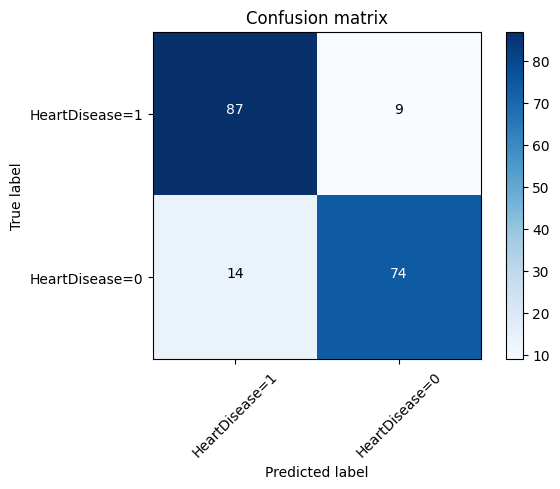

In [71]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HeartDisease=1','HeartDisease=0'],normalize= False,  title='Confusion matrix')

In [72]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87        88
           1       0.86      0.91      0.88        96

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [73]:
# trying SVM
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [74]:
yhat = clf.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

Confusion matrix, without normalization
[[92  4]
 [20 68]]


              precision    recall  f1-score   support

           0       0.94      0.77      0.85        88
           1       0.82      0.96      0.88        96

    accuracy                           0.87       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.87      0.87       184



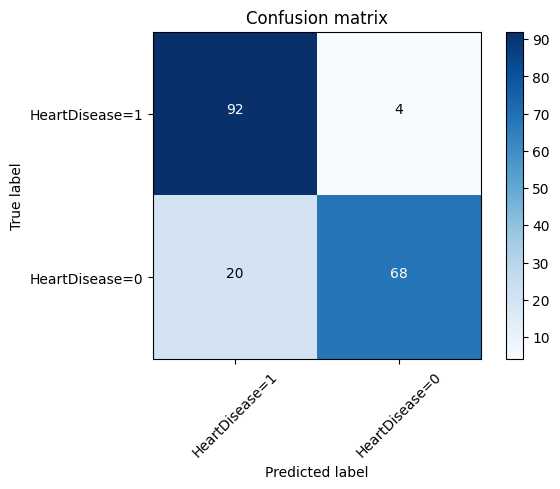

In [75]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HeartDisease=1','HeartDisease=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

In [76]:
# trying KNN
ks = 10
mean_acc = np.zeros((ks-1))
std_acc = np.zeros((ks-1))

for k in range(1, ks):
    neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)
    
    std_acc[k-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
mean_acc

array([0.86, 0.86, 0.89, 0.89, 0.88, 0.9 , 0.9 , 0.92, 0.89])

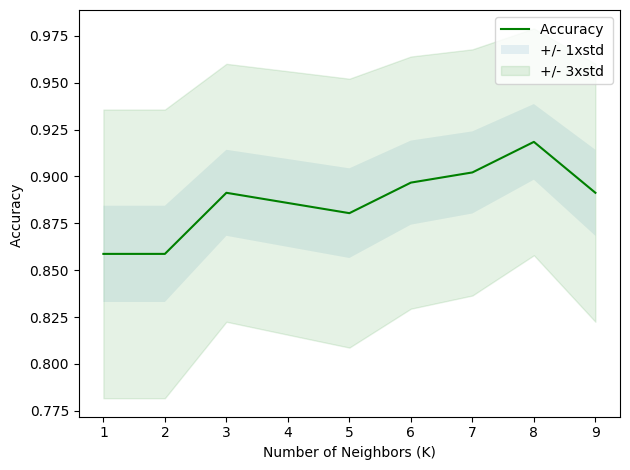

In [77]:
plt.plot(range(1,ks),mean_acc,'g')
plt.fill_between(range(1,ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [78]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

yhat = knn.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

Confusion matrix, without normalization
[[93  3]
 [17 71]]
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        88
           1       0.85      0.97      0.90        96

    accuracy                           0.89       184
   macro avg       0.90      0.89      0.89       184
weighted avg       0.90      0.89      0.89       184



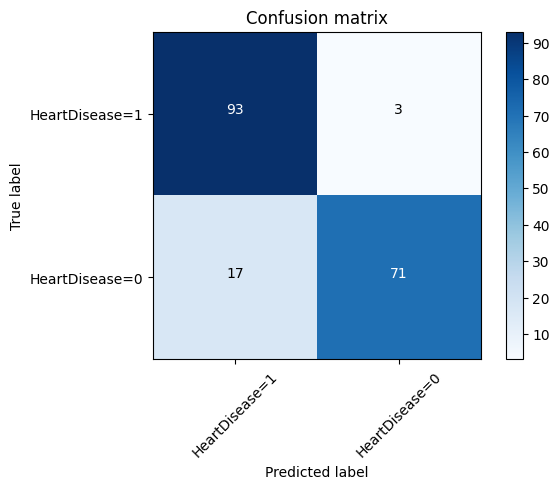

In [79]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HeartDisease=1','HeartDisease=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

In [80]:
# trying Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

yhat = rf.predict(X_test)
yhat

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

Confusion matrix, without normalization
[[88  8]
 [18 70]]
              precision    recall  f1-score   support

           0       0.90      0.80      0.84        88
           1       0.83      0.92      0.87        96

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



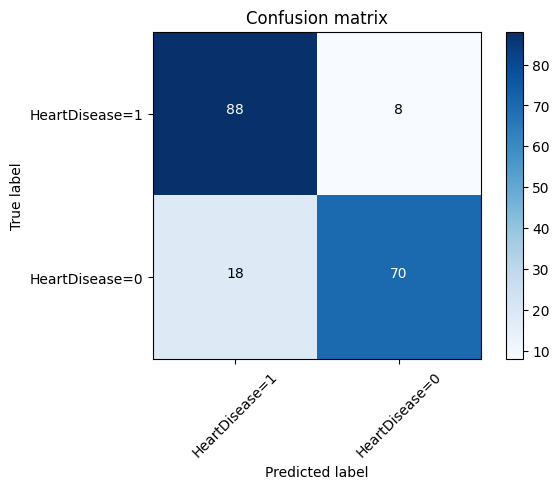

In [81]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HeartDisease=1','HeartDisease=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

### Trying Voting classifier

In [82]:
KNN = KNeighborsClassifier(n_neighbors=3)
RF = RandomForestClassifier()
SVM = SVC()
voting_clf = VotingClassifier(
 estimators=[('knn', KNN), ('rf', RF), ('svc', SVM)],
 voting='hard'
 )
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [83]:
for clf in (KNN, RF, SVM, voting_clf):
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, yhat))

KNeighborsClassifier 0.8913043478260869
RandomForestClassifier 0.8695652173913043
SVC 0.8695652173913043
VotingClassifier 0.875


In [84]:
yhat = voting_clf.predict(X_test)

Confusion matrix, without normalization
[[92  4]
 [19 69]]
              precision    recall  f1-score   support

           0       0.95      0.78      0.86        88
           1       0.83      0.96      0.89        96

    accuracy                           0.88       184
   macro avg       0.89      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



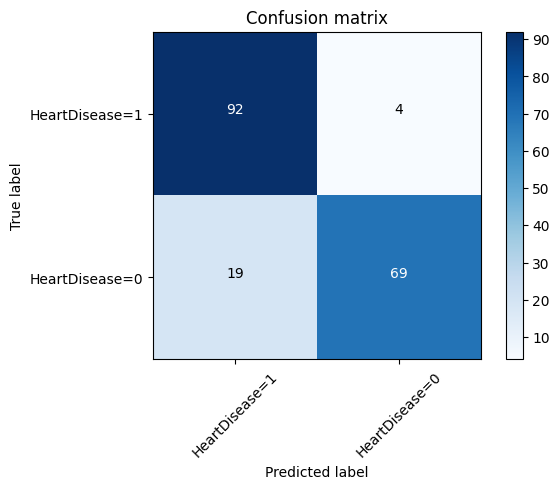

In [85]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HeartDisease=1','HeartDisease=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

### Trying a simple Deep Learning model

In [86]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss= keras.losses.BinaryCrossentropy(from_logits=True))

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 1s 1ms/step - loss: 0.6755
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5671
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4924
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4364
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3987
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3758
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3602
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3500
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3422
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3341
Epoch 11/100
23/23 [==============================] - 0s 2ms/step - loss: 0.3279
Epoch 12/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3236
Epoch 13/100
23/23 [=============================

In [87]:
yhat = model.predict(X_test)

def my_func(x):
    # Define your function here
    if x > 0.5:
        return 1
    else:
        return 0
    
my_vectorized_func = np.vectorize(my_func)
result = my_vectorized_func(yhat)

result = result.flatten()
yhat = result

6/6 [==============================] - 0s 1ms/step


Confusion matrix, without normalization
[[88  8]
 [22 66]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81        88
           1       0.80      0.92      0.85        96

    accuracy                           0.84       184
   macro avg       0.85      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



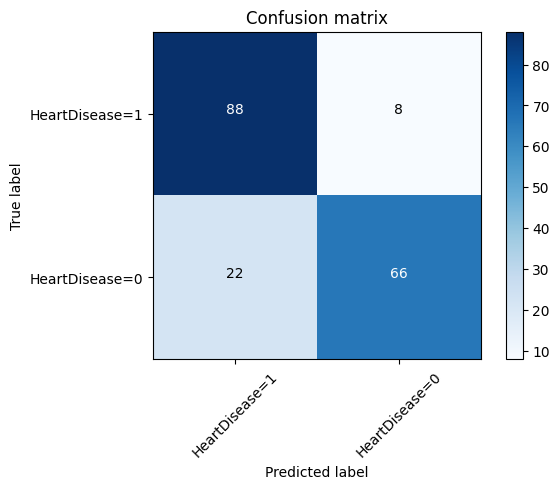

In [88]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HeartDisease=1','HeartDisease=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

### Getting the most important features using Random Forest

In [89]:
rfc = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=4)
rfc.fit(X_train, y_train)
importances = rfc.feature_importances_

indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f) ---> %s" % (f + 1, indices[f], importances[indices[f]], data.columns[indices[f]]))

Feature ranking:
1. feature 10 (0.297891) ---> ST_Slope
2. feature 2 (0.186203) ---> ChestPainType
3. feature 9 (0.105820) ---> Oldpeak
4. feature 8 (0.090081) ---> ExerciseAngina
5. feature 7 (0.089232) ---> MaxHR
6. feature 4 (0.079122) ---> Cholesterol
7. feature 0 (0.048357) ---> Age
8. feature 1 (0.031156) ---> Sex
9. feature 3 (0.031130) ---> RestingBP
10. feature 5 (0.027388) ---> FastingBS
11. feature 6 (0.013621) ---> RestingECG


In [90]:
columns = ['Age','Sex','RestingBP','FastingBS','RestingECG']

data.drop(columns=columns, axis=1, inplace=True)
data.head()

,ChestPainType,Cholesterol,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,1,289,172,0,0.0,2,0
1,2,180,156,0,1.0,1,1
2,1,283,98,0,0.0,2,0
3,0,214,108,1,1.5,1,1
4,2,195,122,0,0.0,2,0


### Trying the above things again in order to see if we get a higher accuracy or not

In [91]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [92]:
KNN = KNeighborsClassifier(n_neighbors=3)
RF = RandomForestClassifier()
SVM = SVC()
voting_clf = VotingClassifier(
 estimators=[('knn', KNN), ('rf', RF), ('svc', SVM)],
 voting='hard'
 )
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=3)),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [93]:
for clf in (KNN, RF, SVM, voting_clf):
    clf.fit(X_train, y_train)
    yhat = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, yhat))

KNeighborsClassifier 0.8532608695652174
RandomForestClassifier 0.8695652173913043
SVC 0.8641304347826086
VotingClassifier 0.8695652173913043


In [94]:
yhat = voting_clf.predict(X_test)

Confusion matrix, without normalization
[[89  7]
 [17 71]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        88
           1       0.84      0.93      0.88        96

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



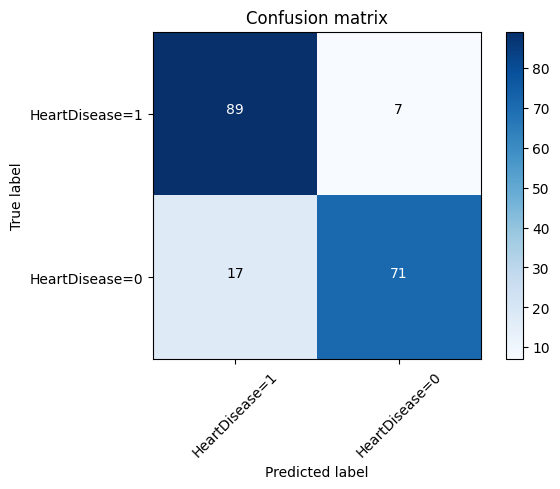

In [95]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HeartDisease=1','HeartDisease=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))

In [96]:
model = Sequential([
    Dense(units=25, activation='relu'),
    Dense(units=15, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer=keras.optimizers.Adam(),
              loss= keras.losses.BinaryCrossentropy(from_logits=True))

model.fit(X_train, y_train, epochs=100)

Epoch 1/100


c:\Users\RaDmAn2222\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py:5818: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


23/23 [==============================] - 1s 1ms/step - loss: 0.6243
Epoch 2/100
23/23 [==============================] - 0s 1ms/step - loss: 0.5123
Epoch 3/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4553
Epoch 4/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4233
Epoch 5/100
23/23 [==============================] - 0s 1ms/step - loss: 0.4026
Epoch 6/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3905
Epoch 7/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3825
Epoch 8/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3763
Epoch 9/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3713
Epoch 10/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3676
Epoch 11/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3641
Epoch 12/100
23/23 [==============================] - 0s 1ms/step - loss: 0.3606
Epoch 13/100
23/23 [=============================

In [97]:
yhat = model.predict(X_test)

def my_func(x):
    # Define your function here
    if x > 0.5:
        return 1
    else:
        return 0
    
my_vectorized_func = np.vectorize(my_func)
result = my_vectorized_func(yhat)

result = result.flatten()
yhat = result

6/6 [==============================] - 0s 2ms/step


Confusion matrix, without normalization
[[89  7]
 [19 69]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84        88
           1       0.82      0.93      0.87        96

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



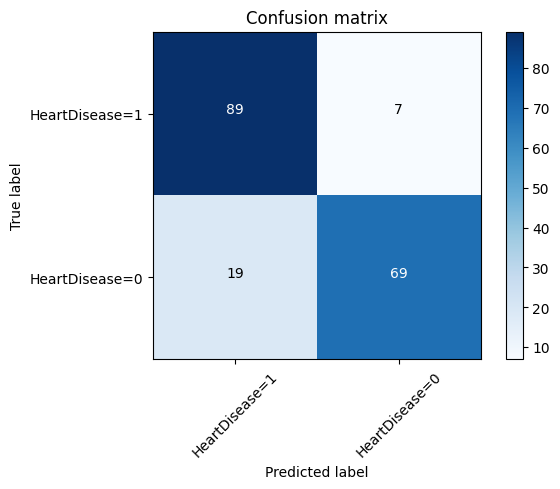

In [98]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['HeartDisease=1','HeartDisease=0'],normalize= False,  title='Confusion matrix')

print (classification_report(y_test, yhat))